In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#liest die Datensätze ein
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
#change the strings into values and clear up NaN
def transf_strings_in_values(x):
    #Lines with strings
    lws = x.dtypes[x.dtypes == "object"].index
    los = x.dtypes[x.dtypes != "object"].index
    
    for a in lws:
        x[a] = x[a].fillna("Unknown")
        strings = np.unique(train[a])
        for b in strings:
            table = train[a] == b
            train[a][table] = np.searchsorted(strings,b)
    for a in los:
        x[a] = x[a].fillna(np.mean(x[a]))
transf_strings_in_values(train)

/home/maximilian/.local/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [4]:
#norm feature from 0 to 1 and save in dictionary
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(train.values[:,1:-1].astype(np.float32))
Train = {'feature_names': train.columns[1:], 'data': X_train_minmax.astype(np.float32), 'target': train.values[:,-1].astype(np.float32)}

In [5]:
#make 3 Plots with linear regression
def m3PLR(indices):
    from sklearn import datasets, linear_model
    # Create linear regression object
    f, ax = plt.subplots(len(indices), 2, figsize=(8,10))
    for x in range(len(indices)):
        regr = linear_model.LinearRegression(n_jobs=-1)
        # Train the model using the training sets
        regr.fit(Train['data'][:,indices[x]].reshape(1460,1),Train['target'].reshape(1460,1))
        ax[x,0].title.set_text(Train['feature_names'][indices[x]])
        ax[x,0].plot(Train['data'][:,indices[x]].reshape(1460,1), regr.predict(Train['data'][:,indices[x]].reshape(1460,1)), color='red',
           linewidth=1)
        ax[x,0].scatter(Train['data'][:,indices[x]].reshape(1460,1),Train['target'].reshape(1460,1))
        ax[x,1].hist(regr.predict(Train['data'][:,indices[x]].reshape(1460,1)) - Train['target'].reshape(1460,1), np.linspace(-2e5,2e5,15))
    plt.tight_layout()
    plt.show()

Feature ranking:
61. feature GarageCars (0.416004) dependency between variables (0.701648) 
46. feature GrLivArea (0.603498) dependency between variables (0.666929) 
17. feature OverallQual (1.000000) dependency between variables (1.000000) 


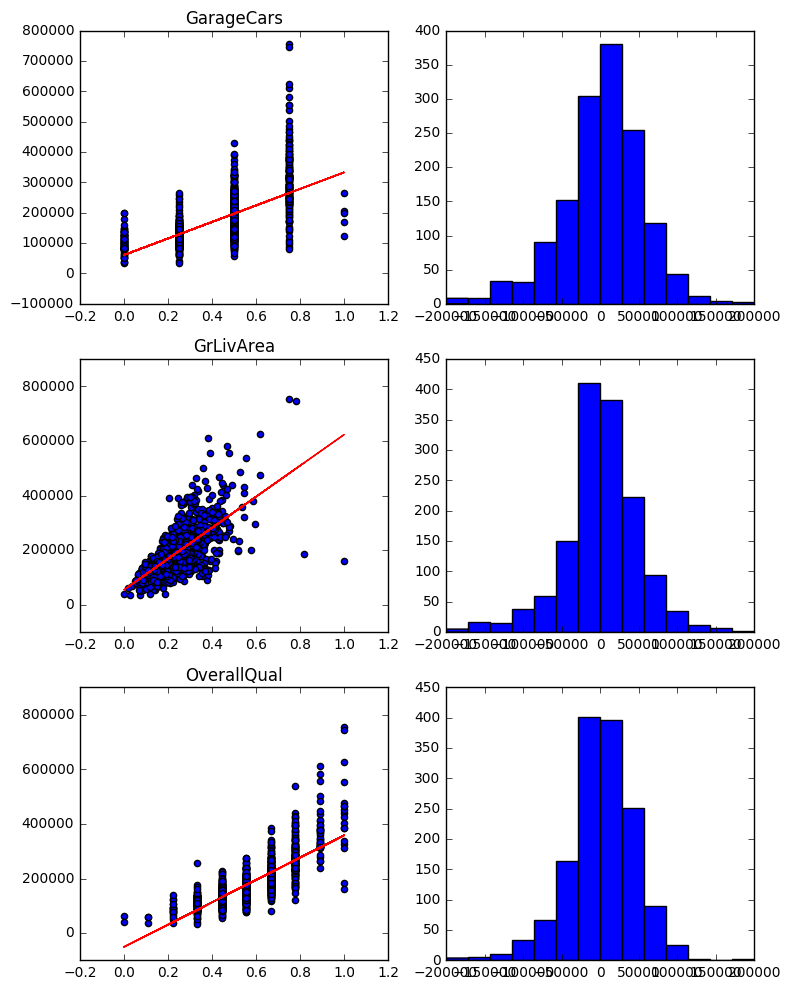

In [6]:
from sklearn.feature_selection import f_regression, mutual_info_regression

f_test, _ = f_regression(Train['data'], Train['target'])
f_test /= np.max(f_test)
indices = np.argsort(f_test)[-3:]

mi = mutual_info_regression(Train['data'], Train['target'])
mi /= np.max(mi)

print("Feature ranking:")
for f in indices:
    print("%d. feature %s (%f) dependency between variables (%f) " % (f + 1, Train['feature_names'][f], f_test[f], mi[f]))
m3PLR(indices)